# Análise de Dados: [Influencer VM]

##  Objetivo da Análise

- **Explorar dados da cliente a fim de demonstrar informações úteis sobre seu trabalho no ano de 2024 para identificar melhorias ou pontos que precisem ser atacados em sua abordagem**
- **Fazer uma análise exploratória para criar um modelo preditivo e ter uma estimativa de ganho mensal baseado nas horas trabalhadas**

In [92]:
# Imports

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#  Carregando os dados

In [93]:
# Carregar o dataset
df_notion = pd.read_excel("dados_formatados_notion.xlsx")
df = pd.read_excel("dados_formatados.xlsx")

In [124]:
# Agrupar por meio e somar os salários
tokens_por_meio = df.groupby("Meio")["Tokens"].sum().reset_index()


In [125]:
# Ordenar por soma de salários
tokens_por_meio = tokens_por_meio.sort_values("Tokens", ascending=False)

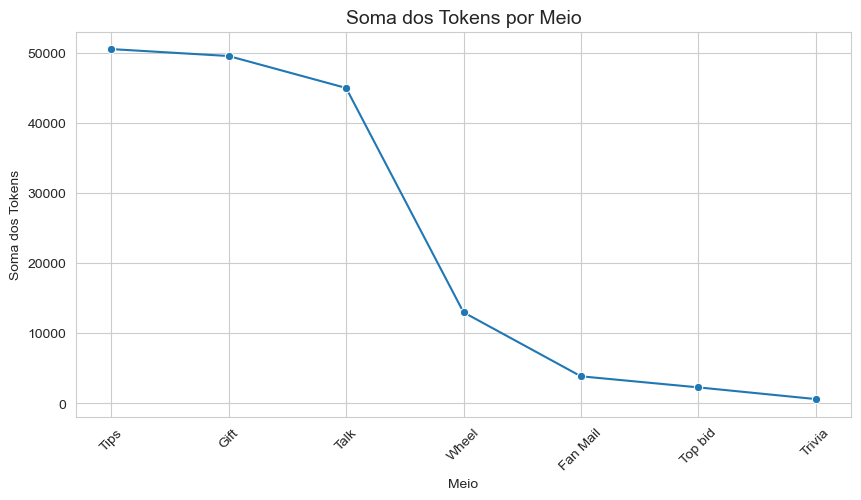

In [147]:
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
sns.lineplot(data=tokens_por_meio, x = "Meio", y = "Tokens", marker="o", palette="viridis")
plt.title("Soma dos Tokens por Meio", fontsize=14)
plt.xlabel("Meio")
plt.ylabel("Soma dos Tokens")
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig('Sum_tokens_X_meio', dpi =300)
plt.show()

In [148]:
# Criar uma nova coluna com lucro por minuto
df_notion = df_notion[df_notion["Minutos_trabalhados"] > 0] # Para essa distribuição não usaremos valores onde não há horas trabalhadas
df_notion["Tokens_Por_Minuto"] = df_notion["Token"] / df_notion["Minutos_trabalhados"]

In [128]:
# Agrupar por carga horária e calcular a média do lucro por minuto
lucro_medio_por_minuto = df_notion.groupby("Minutos_trabalhados")["Tokens_Por_Minuto"].mean().reset_index()

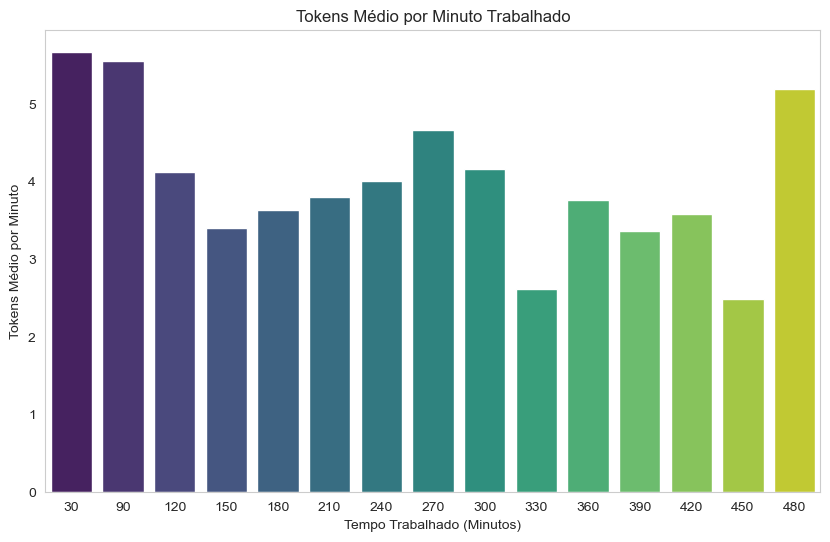

In [139]:
plt.figure(figsize=(10, 6))
sns.barplot(data=lucro_medio_por_minuto, x="Minutos_trabalhados", y="Tokens_Por_Minuto", palette="viridis")
plt.title("Tokens Médio por Minuto Trabalhado")
plt.xlabel("Tempo Trabalhado (Minutos)")
plt.ylabel("Tokens Médio por Minuto")
plt.grid(axis="y")
plt.savefig('Tokens_mean_by_min_X_Time_min', dpi =300)
plt.show()

In [149]:
# 'dayfirst=True' para garantir o formato dd/mm/yyyy
df_notion["Data"] = pd.to_datetime(df_notion["Data"], dayfirst=True, errors="coerce")  

# Formato de período mensal (YYYY-MM)
df_notion["Mes"] = df_notion["Data"].dt.month

In [133]:
# Agrupar por mês e calcular a média de tokens por minuto trabalhado
tokens_medio_por_minuto_mes = df_notion.groupby("Mes")["Tokens_Por_Minuto"].mean().reset_index()

# Converter a coluna "Mes" para string para que apareça corretamente no gráfico
tokens_medio_por_minuto_mes["Mes"] = tokens_medio_por_minuto_mes["Mes"].astype(str)


In [134]:
##### Debug ######
print(df_notion["Minutos_trabalhados"].isna().sum())  # Verifica valores nulos
print((df_notion["Minutos_trabalhados"] == 0).sum())  # Conta quantos são zero
print(df_notion["Minutos_trabalhados"].dtype)  # Confere o tipo de dado

0
0
int64


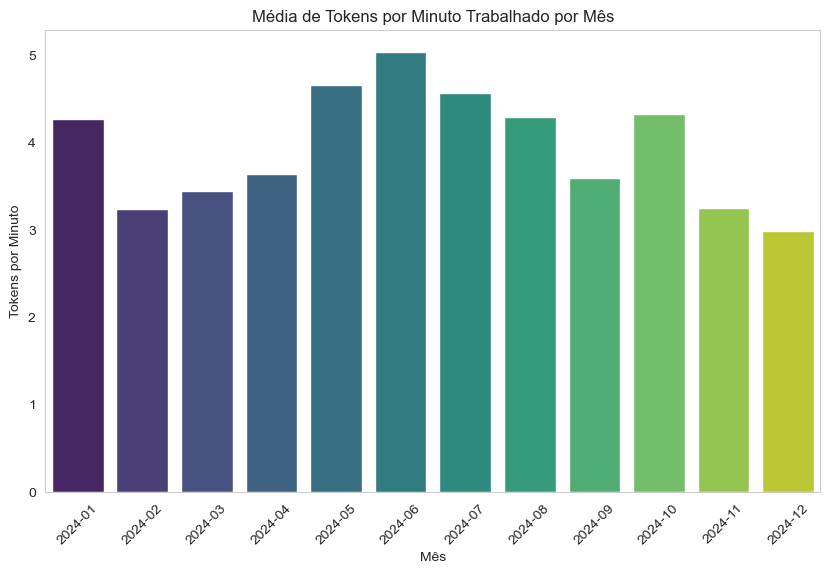

In [138]:
plt.figure(figsize=(10, 6))
sns.barplot(data=tokens_medio_por_minuto_mes, x="Mes", y="Tokens_Por_Minuto", palette="viridis")
plt.title("Média de Tokens por Minuto Trabalhado por Mês")
plt.xlabel("Mês")
plt.ylabel("Tokens por Minuto")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.savefig('Tokens_by_min_X_Month', dpi =300)
plt.show()


In [136]:
# Agrupar por mês e calcular a média de tokens por minuto trabalhado
tokens_medio_por_minuto_semana = df_notion.groupby("Semana")["Tokens_Por_Minuto"].mean().reset_index()

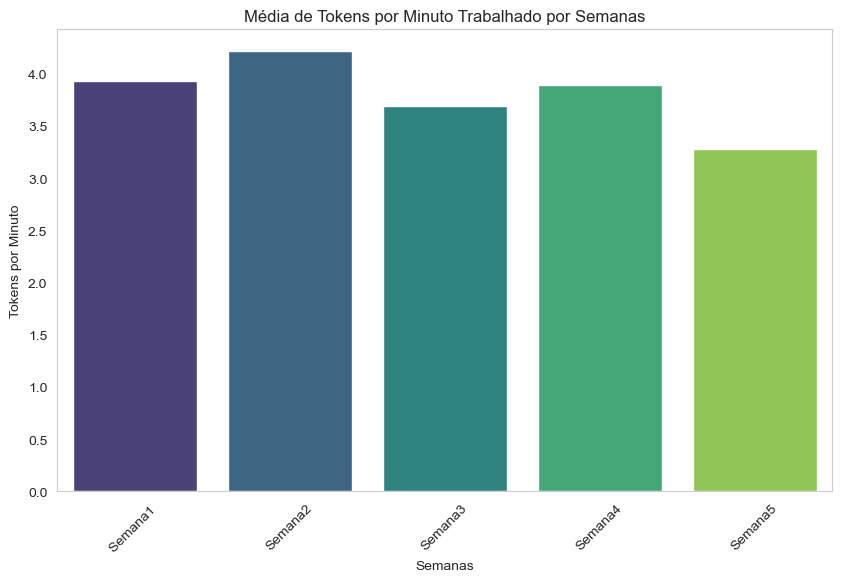

In [140]:
plt.figure(figsize=(10, 6))
sns.barplot(data=tokens_medio_por_minuto_semana, x="Semana", y="Tokens_Por_Minuto", palette="viridis")
plt.title("Média de Tokens por Minuto Trabalhado por Semanas")
plt.xlabel("Semanas")
plt.ylabel("Tokens por Minuto")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.savefig('Tokens_mean_by_min_X_Week', dpi =300)
plt.show()

In [142]:
# Agrupar por periodo e calcular a soma dos tokens por perioro
tokens_por_periodo = df.groupby("Periodo")["Tokens"].sum().reset_index()

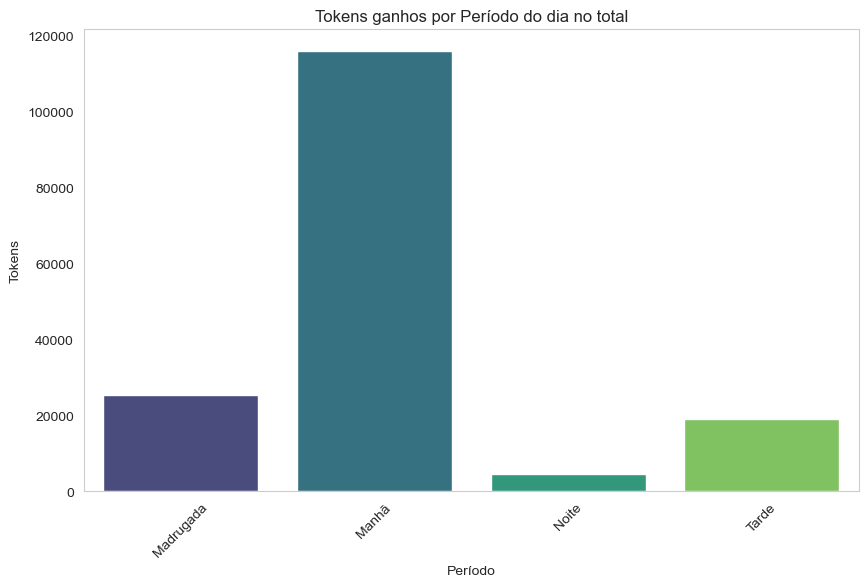

In [143]:
plt.figure(figsize=(10, 6))
sns.barplot(data=tokens_por_periodo, x="Periodo", y="Tokens", palette="viridis")
plt.title("Tokens ganhos por Período do dia no total")
plt.xlabel("Período")
plt.ylabel("Tokens")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.savefig('Tokens_gained_X_day_period', dpi =300)
plt.show()

In [145]:
# Agrupar por periodo e calcular a soma dos tokens por perioro
tokens_medio_por_periodo = df.groupby("Periodo")["Tokens"].mean().reset_index()

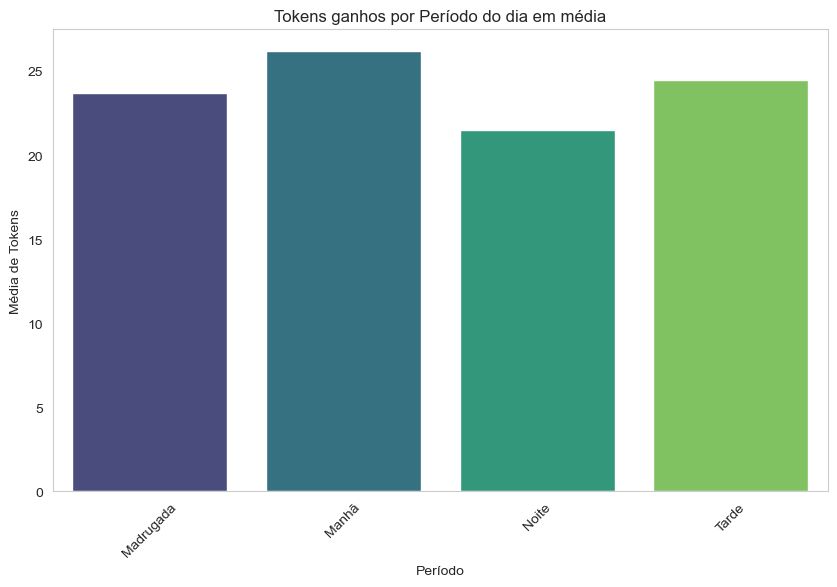

In [146]:
plt.figure(figsize=(10, 6))
sns.barplot(data=tokens_medio_por_periodo, x="Periodo", y="Tokens", palette="viridis")
plt.title("Tokens ganhos por Período do dia em média")
plt.xlabel("Período")
plt.ylabel("Média de Tokens")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.savefig('Tokens_gained_mean_X_day_period', dpi =300)
plt.show()

# Predição de dados
## Análise Exploratória

In [230]:
df_notion.dropna()

,Data,Token,Semana,Horas trabalhadas,Minutos_trabalhados,Mes,Dia_semana,Mes_sin,Mes_cos,Dia_semana_sin,Dia_semana_cos,Media_minutos_mes,Soma_tokens_mes,Semana,Media_minutos_semanal,Soma_tokens_semanal,Tokens_Por_Minuto
1,2024-09-01,170,Semana1,2hrs,120,9,6,-1.000000e+00,-1.836970e-16,-0.781831,0.623490,246.666667,17260,Semana1,269.230769,41390,1.416667
2,2024-10-01,160,Semana1,3hrs,180,10,1,-8.660254e-01,5.000000e-01,0.781831,0.623490,250.909091,11780,Semana1,269.230769,41390,0.888889
4,2024-12-01,1500,Semana1,5hrs,300,12,6,-2.449294e-16,1.000000e+00,-0.781831,0.623490,255.000000,9680,Semana1,269.230769,41390,5.000000
5,2024-01-13,490,Semana1,3hrs,180,1,5,5.000000e-01,8.660254e-01,-0.974928,-0.222521,227.142857,13700,Semana1,269.230769,41390,2.722222
6,2024-01-15,1760,Semana2,5hrs,300,1,0,5.000000e-01,8.660254e-01,0.000000,1.000000,227.142857,13700,Semana2,273.125000,54630,5.866667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,2024-12-13,1040,Semana3,4hrs,240,12,4,-2.449294e-16,1.000000e+00,-0.433884,-0.900969,255.000000,9680,Semana3,243.125000,40880,4.333333
337,2024-12-15,0,Semana4,3hrs,180,12,6,-2.449294e-16,1.000000e+00,-0.781831,0.623490,255.000000,9680,Semana4,228.857143,32210,0.000000
339,2024-12-17,1090,Semana4,"30min, 6hrs",390,12,1,-2.449294e-16,1.000000e+00,0.781831,0.623490,255.000000,9680,Semana4,228.857143,32210,2.794872
340,2024-12-18,310,Semana4,"2hrs, 30min",150,12,2,-2.449294e-16,1.000000e+00,0.974928,-0.222521,255.000000,9680,Semana4,228.857143,32210,2.066667


In [231]:
df_notion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171 entries, 1 to 341
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Data                   171 non-null    datetime64[ns]
 1   Token                  171 non-null    int64         
 2   Semana                 171 non-null    object        
 3   Horas trabalhadas      171 non-null    object        
 4   Minutos_trabalhados    171 non-null    int64         
 5   Mes                    171 non-null    int64         
 6   Dia_semana             171 non-null    int64         
 7   Mes_sin                171 non-null    float64       
 8   Mes_cos                171 non-null    float64       
 9   Dia_semana_sin         171 non-null    float64       
 10  Dia_semana_cos         171 non-null    float64       
 11  Media_minutos_mes      171 non-null    float64       
 12  Soma_tokens_mes        171 non-null    int64         
 13  Seman

In [232]:
df_notion.corr()

,Token,Minutos_trabalhados,Mes,Dia_semana,Mes_sin,Mes_cos,Dia_semana_sin,Dia_semana_cos,Media_minutos_mes,Soma_tokens_mes,Media_minutos_semanal,Soma_tokens_semanal,Tokens_Por_Minuto
Token,1.000000,0.545323,-0.072558,0.091982,0.062783,-0.111748,-0.223885,0.078509,0.167591,0.139583,0.168625,0.145599,0.746741
Minutos_trabalhados,0.545323,1.000000,-0.029875,0.040387,0.144310,0.049195,-0.034970,-0.009591,0.314972,0.054253,0.202734,0.172665,-0.031341
Mes,-0.072558,-0.029875,1.000000,-0.012365,-0.764800,0.185610,0.049755,0.059155,-0.094851,-0.071068,-0.033555,-0.096830,-0.049090
Dia_semana,0.091982,0.040387,-0.012365,1.000000,0.064481,-0.139488,-0.725077,-0.466313,0.103921,0.058543,-0.060637,0.008295,0.082178
Mes_sin,0.062783,0.144310,-0.764800,0.064481,1.000000,0.042564,-0.023915,-0.122935,0.458167,-0.178458,-0.013138,0.101620,-0.055679
Mes_cos,-0.111748,0.049195,0.185610,-0.139488,0.042564,1.000000,0.137391,0.039569,0.156188,-0.541376,-0.023915,-0.034712,-0.177007
Dia_semana_sin,-0.223885,-0.034970,0.049755,-0.725077,-0.023915,0.137391,1.000000,0.077010,-0.058403,-0.062680,0.019828,-0.018028,-0.241229
Dia_semana_cos,0.078509,-0.009591,0.059155,-0.466313,-0.122935,0.039569,0.077010,1.000000,-0.082234,0.002850,0.077932,0.000769,0.065739
Media_minutos_mes,0.167591,0.314972,-0.094851,0.103921,0.458167,0.156188,-0.058403,-0.082234,1.000000,0.172247,-0.002388,0.092107,-0.091513
Soma_tokens_mes,0.139583,0.054253,-0.071068,0.058543,-0.178458,-0.541376,-0.062680,0.002850,0.172247,1.000000,0.044140,0.018005,0.092741


In [17]:
df_notion.describe()

,Token,Minutos_trabalhados
count,348.000000,348.000000
mean,490.057471,124.913793
std,664.888886,142.813409
min,0.000000,0.000000
25%,0.000000,0.000000
50%,60.000000,0.000000
75%,892.500000,240.000000
max,3300.000000,480.000000


<AxesSubplot:xlabel='Minutos_trabalhados', ylabel='Count'>

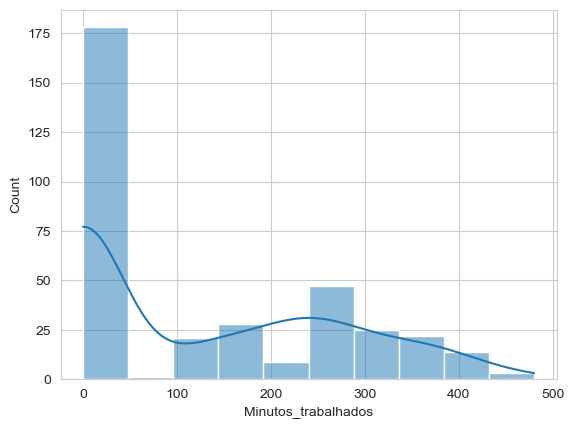

In [22]:
#Histograma da variável preditora
sns.histplot(data= df_notion, x = "Minutos_trabalhados", kde=True , palette="viridis")

# Preparação dos Dados

In [23]:
# Preparação da variável de entrada X
X = np.array(df_notion['Minutos_trabalhados'])

In [24]:
type(X)

numpy.ndarray

In [25]:
# Reajuste do shape de X
X = X.reshape(-1,1)

In [26]:
y = df_notion['Token']

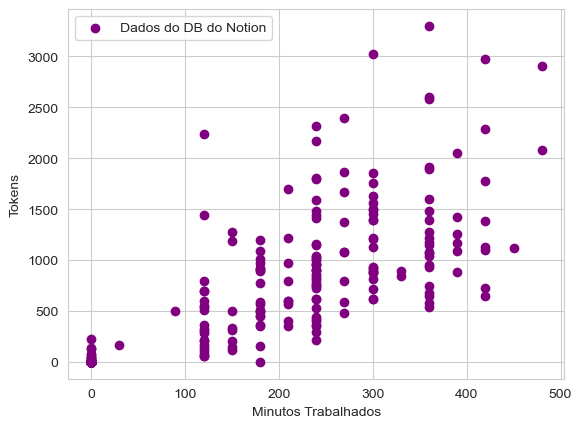

In [53]:
#Gráfico de dispersão (correlação) entre X e y
plt.scatter(X,y, color = 'purple', label= 'Dados do DB do Notion')
plt.xlabel('Minutos Trabalhados')
plt.ylabel('Tokens')
plt.legend()
plt.show()

In [28]:
#Divisão de dados entre Treino e Teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X,y, test_size = 0.2, random_state = 14)

In [29]:
X_treino.shape

(278, 1)

In [30]:
X_teste.shape

(70, 1)

# Modelagem Preditiva
### Modelo usado regressão linear

In [32]:
#Modelo de regressão linear simples
modelo = LinearRegression()

In [33]:
# Treino do modelo
modelo.fit(X_treino, y_treino)

LinearRegression()

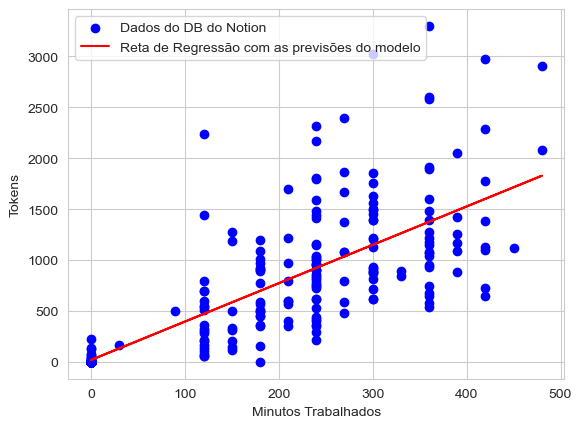

In [54]:
plt.scatter(X, y, color = 'blue', label = 'Dados do DB do Notion')
plt.plot(X, modelo.predict(X), color= 'red', label = 'Reta de Regressão com as previsões do modelo')
plt.xlabel('Minutos Trabalhados')
plt.ylabel('Tokens')
plt.legend()
plt.show()

In [36]:
#Avaliação do Score do modelo
score = modelo.score(X_teste, y_teste)

print(f"coeficiente R^2: {score:.2f}")

coeficiente R^2: 0.79


# Deploy do Modelo

In [37]:
# Intercepto - parâmetro w0
modelo.intercept_

18.502651041842228

In [55]:
# Intercepto - parâmetro w0
modelo.coef_

array([3.77027906])

In [73]:
# Definição de um novo valor para os minutos trabalhados
#minutos_trabalhados_prev = np.array([[3600]])

intercept = 18.502651041842228

coefient = 3.77027906

horas_trabalhadas = 65

#Previsão com o modelo
#tokens_previstos = modelo.predict(minutos_trabalhados_prev)
# ou 
tokens_previstos = intercept + (coefient * (horas_trabalhadas*60 ))

print (f"Se o total de horas trabalhadas por mês somarem {horas_trabalhadas}, a expectativa de tokens ganhos será de {tokens_previstos:.0f}")


Se o total de horas trabalhadas por mês somarem 65, a expectativa de tokens ganhos será de 14723


# Criando um modelo mais complexo


Apesar do modelo simples ter um ótimo score: coeficiente quadratico de 0.79 de 1.0 ele não considera alguns valores temporais que será adicionado no modelo abaixo

# Preparação dos Dados

In [96]:
# Conversão de data para o formato de data padrão
df_notion['Data'] = pd.to_datetime(df_notion['Data'], format="%D/%M/%Y")
# Extraindo o Mês da Data
df_notion['Mes'] = df_notion['Data'].dt.month

# Criando uma soma dos minutos trabalhados em um mês
df_notion['Soma_minutos_mes'] = df_notion.groupby('Mes')['Minutos_trabalhados'].transform('sum')

# Criando uma soma dos minutos trabalhados em um mês
df_notion['Soma_tokens_mes'] =  df_notion.groupby('Mes')['Token'].transform('sum')


## Extração de Dados Temporais de Data

In [99]:
# Criando dados temporais com Seno e Cosseno para dados contínuos
df_notion['Mes_sin'] = np.sin(2 * np.pi * df_notion['Mes'] / 12)
df_notion['Mes_cos'] = np.cos(2 * np.pi * df_notion['Mes'] / 12)


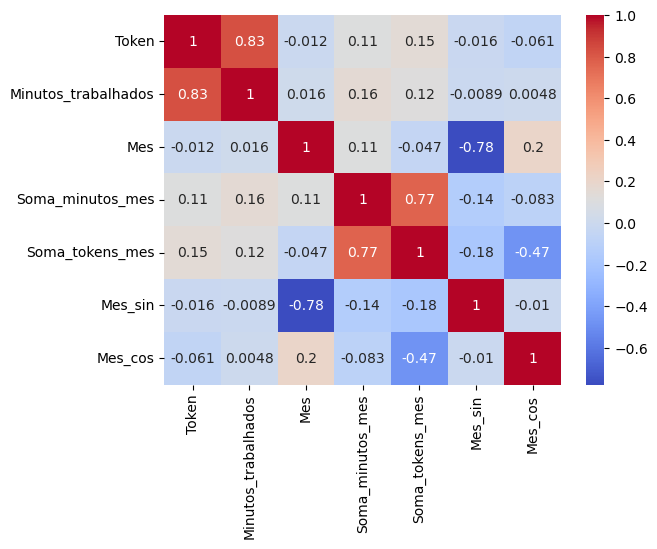

In [100]:
# Calcular a matriz de correlação
corr = df_notion.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

# Modelagem preditiva
## Modelo usado: Prophet

In [102]:
from prophet import Prophet

# Adicionar regressores ao DataFrame
df_prophet = df_notion.rename(columns={'Data': 'ds', 'Soma_tokens_mes': 'y'})
df_prophet['Soma_minutos_mes'] = df_notion['Soma_minutos_mes']
df_prophet['Mes_sin'] = df_notion['Mes_sin']
df_prophet['Mes_cos'] = df_notion['Mes_cos']



## Regressores extras e fit do modelo

In [103]:
# Criar o modelo com regressores
modelo_prophet = Prophet()
modelo_prophet.add_regressor('Soma_minutos_mes')
modelo_prophet.add_regressor('Mes_sin')
modelo_prophet.add_regressor('Mes_cos')

# Treinar o modelo
modelo_prophet.fit(df_prophet)


11:44:48 - cmdstanpy - INFO - Chain [1] start processing
11:44:48 - cmdstanpy - INFO - Chain [1] done processing


### Previsão

In [105]:
# Horas trabalhadas exemplo 70 horas no mês de janeiro
horas_trabalhadas = 60

mes = 1  

mes_sin = np.sin(2 * np.pi * mes / 12)
mes_cos = np.cos(2 * np.pi * mes / 12)

# Fazer previsões
futuro = modelo_prophet.make_future_dataframe(periods=30)
futuro['Soma_minutos_mes'] = (horas_trabalhadas*60) # Conversão em minutos
futuro['Mes_sin'] = mes_sin
futuro['Mes_cos'] = mes_cos

previsoes = modelo_prophet.predict(futuro)

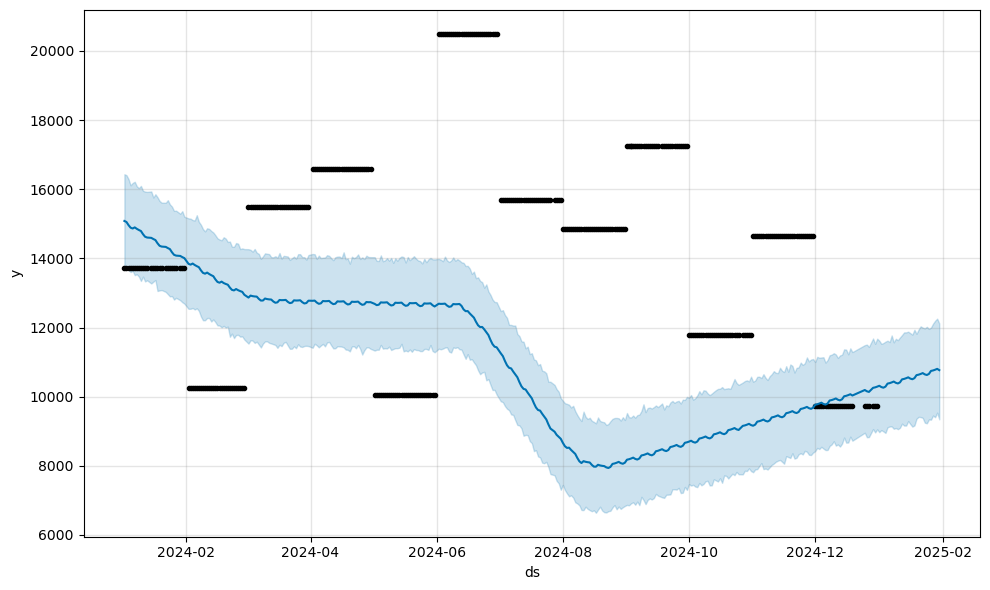

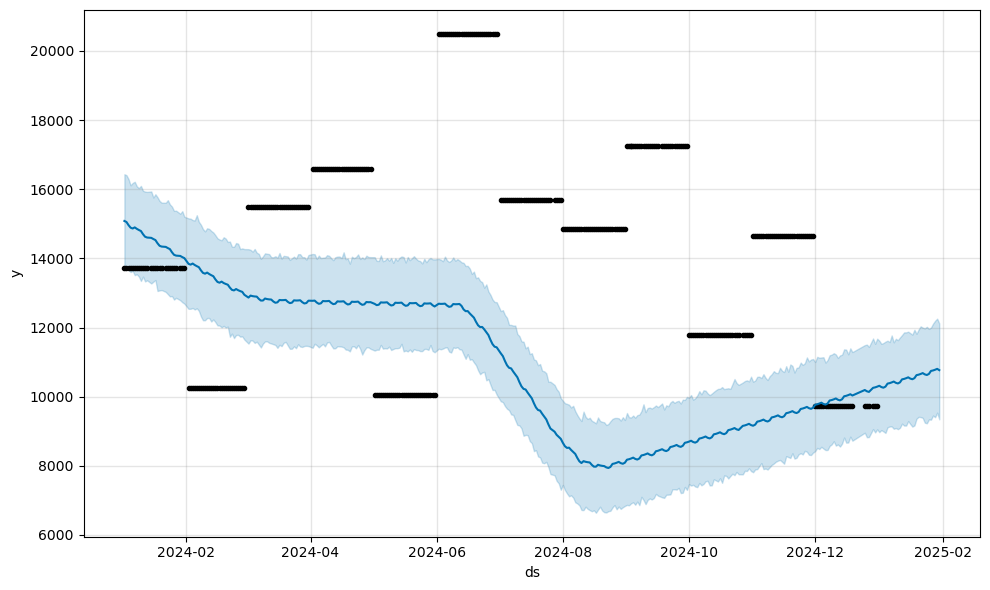

In [106]:
# Plotar as previsões
modelo_prophet.plot(previsoes)

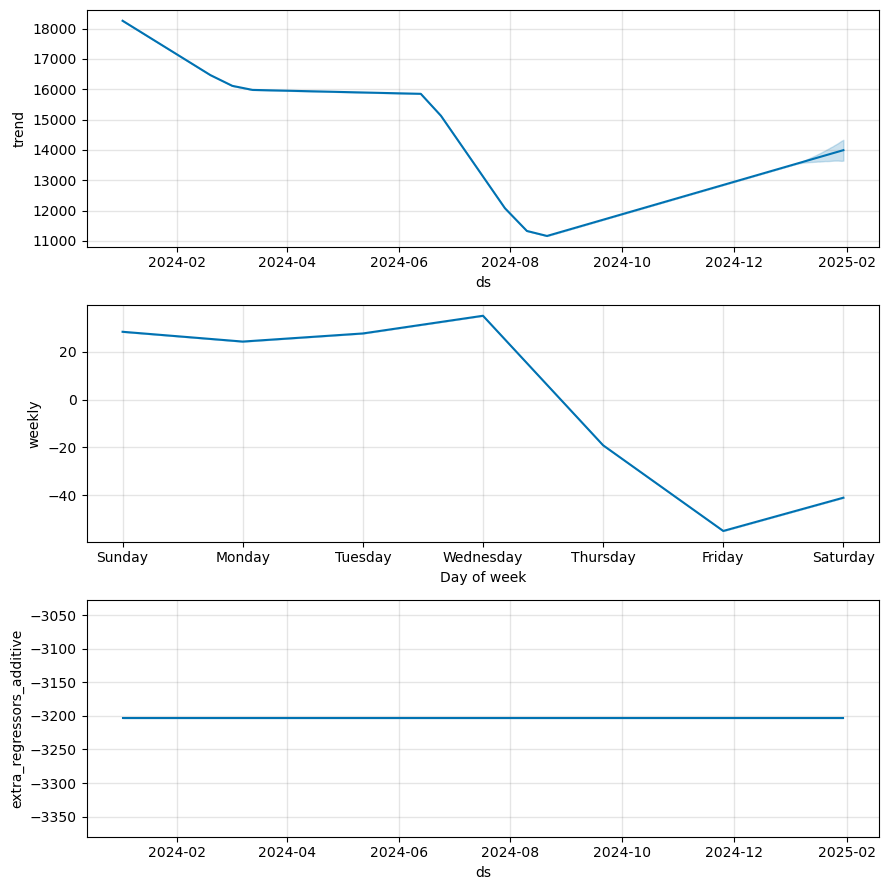

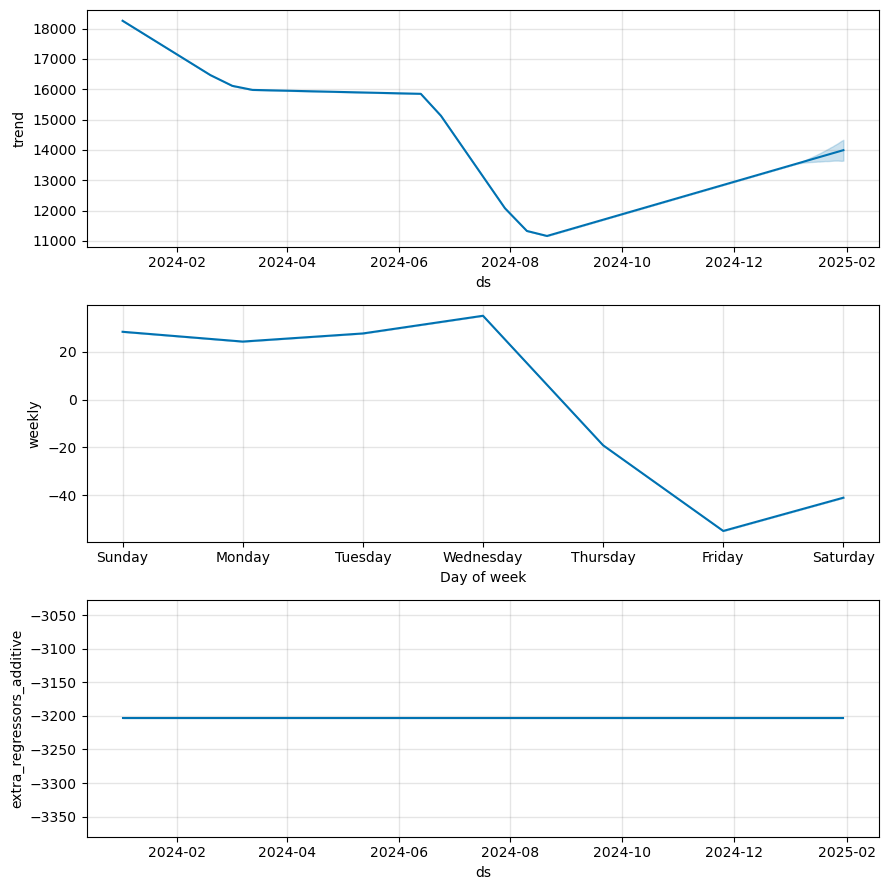

In [107]:
# Plotar os componentes do modelo
modelo_prophet.plot_components(previsoes)

# Validação cruzada (Cross Validation)

In [114]:
from prophet.diagnostics import cross_validation, performance_metrics

# Realizar validação cruzada
df_cv = cross_validation(
    modelo_prophet,
    initial='240 days',  # Período inicial de treino
    period='30 days',   # Intervalo entre cortes
    horizon='60 days'   # Período de previsão (teste)
)

  0%|          | 0/3 [00:00<?, ?it/s]

11:50:12 - cmdstanpy - INFO - Chain [1] start processing
11:50:12 - cmdstanpy - INFO - Chain [1] done processing
11:50:12 - cmdstanpy - INFO - Chain [1] start processing
11:50:12 - cmdstanpy - INFO - Chain [1] done processing
11:50:12 - cmdstanpy - INFO - Chain [1] start processing
11:50:12 - cmdstanpy - INFO - Chain [1] done processing


In [115]:
# Calcular métricas de desempenho
df_metrics = performance_metrics(df_cv)

# Exibir o RMSE
print(df_metrics[['horizon', 'rmse']])

   horizon         rmse
0   6 days  2297.942303
1   7 days  2327.728245
2   8 days  2347.500596
3   9 days  2367.674423
4  10 days  2387.201850
5  11 days  2409.582334
6  12 days  2438.108686
7  13 days  2463.859062
8  14 days  2470.668549
9  15 days  2524.689410
10 16 days  2547.516451
11 17 days  2569.420499
12 18 days  2592.954819
13 19 days  2620.682473
14 20 days  2653.291208
15 21 days  2624.789937
16 22 days  2648.357143
17 23 days  2671.105191
18 24 days  2714.498116
19 25 days  2739.689553
20 26 days  2768.910543
21 27 days  2802.932981
22 28 days  2813.587820
23 29 days  3097.781314
24 30 days  3211.039269
25 31 days  3347.354315
26 32 days  3484.608945
27 33 days  3621.460324
28 34 days  3685.870327
29 35 days  3638.465439
30 36 days  3674.104856
31 37 days  3701.936990
32 38 days  3731.523152
33 39 days  3765.756163
34 40 days  3800.255491
35 41 days  3831.988790
36 42 days  3856.103977
37 43 days  3891.795237
38 44 days  3919.732552
39 45 days  3949.393098
40 46 days  3983

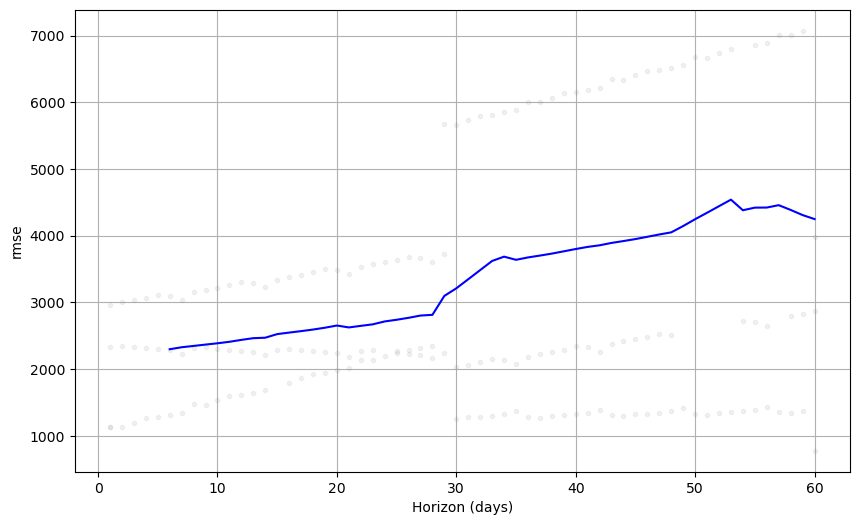

In [116]:
from prophet.plot import plot_cross_validation_metric

# Plotar o RMSE em função do horizonte de previsão
fig = plot_cross_validation_metric(df_cv, metric='rmse')

In [118]:
from prophet.diagnostics import cross_validation, performance_metrics

# Validação cruzada
df_cv = cross_validation(modelo_prophet, initial='30 days', period='15 days', horizon='30 days')

# Calcular métricas de desempenho
metricas = performance_metrics(df_cv)
print(metricas)

  0%|          | 0/21 [00:00<?, ?it/s]

11:53:25 - cmdstanpy - INFO - Chain [1] start processing
11:53:25 - cmdstanpy - INFO - Chain [1] done processing
11:53:25 - cmdstanpy - INFO - Chain [1] start processing
11:53:27 - cmdstanpy - INFO - Chain [1] done processing
11:53:27 - cmdstanpy - INFO - Chain [1] start processing
11:53:30 - cmdstanpy - INFO - Chain [1] done processing
11:53:30 - cmdstanpy - INFO - Chain [1] start processing
11:53:33 - cmdstanpy - INFO - Chain [1] done processing
11:53:33 - cmdstanpy - INFO - Chain [1] start processing
11:53:34 - cmdstanpy - INFO - Chain [1] done processing
11:53:34 - cmdstanpy - INFO - Chain [1] start processing
11:53:35 - cmdstanpy - INFO - Chain [1] done processing
11:53:35 - cmdstanpy - INFO - Chain [1] start processing
11:53:35 - cmdstanpy - INFO - Chain [1] done processing
11:53:35 - cmdstanpy - INFO - Chain [1] start processing
11:53:35 - cmdstanpy - INFO - Chain [1] done processing
11:53:35 - cmdstanpy - INFO - Chain [1] start processing
11:53:35 - cmdstanpy - INFO - Chain [1]

   horizon           mse           rmse            mae      mape     mdape  \
0   3 days  2.620019e+06    1618.647183     868.069593  0.061188  0.012642   
1   4 days  2.688475e+06    1639.657106     882.798553  0.062339  0.004625   
2   5 days  2.701131e+06    1643.511930     900.211540  0.063490  0.019163   
3   6 days  2.713394e+06    1647.238264     915.793080  0.064503  0.019163   
4   7 days  2.702805e+06    1644.021079     926.589094  0.065085  0.023639   
5   8 days  2.828325e+06    1681.762457     954.164239  0.066894  0.024453   
6   9 days  2.978232e+06    1725.755433     993.155580  0.069386  0.025482   
7  10 days  3.155643e+06    1776.412878    1039.837065  0.072528  0.019249   
8  11 days  5.718613e+08   23913.621548    4148.006970  0.273414  0.032851   
9  12 days  1.140621e+09   33773.075303    7299.167643  0.478005  0.067122   
10 13 days  1.710298e+09   41355.754246   10535.227228  0.687552  0.080233   
11 14 days  1.711592e+09   41371.385676   10749.373068  0.702475

# Conclusão

## Modelos preditivos

 Após testar métricas usando parâmetros simples e complexos, devido a natureza simples e a baixa população de dados históricos o modelo simples performou melhor com um R^2 menor do que o modelo mais complexo

# Análise exploratoria dos dados históricos

**Os dados históricos por sua vez trouxe muitas informações valiosas e relevantes que ajudará a cliente com insights e apontamentos de melhorias**

![Grafico de linha mostrando a relação entre os tokens e os tipos de recebimento deles](Sum_tokens_by_meio.png "Sum tokens X Meio")

- **De todos os meios de obtenção de Tokens pela plataforma, Tips , Gift e Talk foram os mais lucrativos com uma grande disparidade entre os demais meios**

![Grafico mostrando relação entre Tokens ganhos em média por minuto e o tempo trabalho por dia em minutos](Tokens_mean_by_minXTokens_mean_worked.png "Tokens/min X Time")

- **De toda carga horária trabalhada os tempos entre 30 minutos a 1 hora e meia é onde se mais obteve um ganho maior de tokens em média, seguido de 8 horas trabalhadas no dia tendo 4 horas e meia como um valor médio mais comum dado o perfil da cliente**

![Grafico mostrando relação entre Tokens ganhos em média por minuto e os meses correspondentes](Tokens_by_minXTokens_mean_worked_monthly.png "Tokens/min X Tokens montly")

- **De todos os meses Maio, Junho e Julho são os mais lucrativos em média de ganho (Janeiro, Agosto e Outubro a performance foi ótima também) tendo dezembro com o pior lucro em média**

![Grafico mostrando relação entre Tokens ganhos em média por minuto e entre semanas](Tokens_mean_by_minXTokens_mean_worked_weekly.png "Tokens/min X Tokens weekly")

- **A melhor semana ou a mais lucrativa em média foi a segunda semana do mês, porém os resultados não eram muito dispares entre si, não havendo um indicação muito forte de qual semana o ganho médio é maior tendo um delta (_range_) menor que 1 token por minuto em média** 

![Grafico mostrando relação entre Tokens ganhos entre diferentes horários do dia](Tokens_gained_by_day_period.png "Tokens X Periodo")
![Grafico mostrando relação entre Tokens ganhos em média entre diferentes horários do dia](Tokens_gained_mean_by_day_period.png "Tokens média X Periodo")

- **O Horário onde a cliente mais trabalhou foi pela manhã e este é onde se obteve o maior ganho de tokens em média também**

# Análises Futuras

### A Análise foi realizada com os dados históricos de um ano de trabalho, a estrutura foi feita a aceitar mais dados no futuro, com mais informações pode ser feito predições mais claras e baseadas em ano ou grupos maiores como bimestres ou trimestres com maior precisão